## Data Gathering

In [1]:
## Import all useful libraries
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import datetime
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [2]:
# read csv as a Pandas DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [5]:
df_image_predictions = pd.read_csv('image_prediction.tsv', sep='\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# get tweet status by passing index value
tweet = api.get_status(df_archive.tweet_id[7], tweet_mode='extended')

In [8]:
# create tweet_json.txt file if it is not exixted before
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [9]:
# create a tweet id list
tweet_ids = df_archive.tweet_id.values

In [10]:
# list of tweet ids from twitter archive data set
df_tweet_ids = df_archive['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#print time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [11]:
# total no. of tweets received from API
print("The lengh of the result", len(df_tweets))

# Total no. of errors received from API
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2331
The lengh of the errors 25


In [12]:
# create DataFrames with columns I want to use
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# the dataFrame is saved to tweet_json.txt file as per project requirement
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [13]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [14]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34893,7321,9007042,145291,2017-08-01 16:23:56
1,892177421306343426,30220,5468,9007042,145291,2017-08-01 00:17:27
2,891815181378084864,22744,3614,9007042,145291,2017-07-31 00:18:03
3,891689557279858688,38172,7516,9007042,145291,2017-07-30 15:58:51
4,891327558926688256,36428,8071,9007042,145291,2017-07-29 16:00:24


In [15]:
df_api_data.info() # give you summary statistic of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


The 3 dataframes are:-
df_archive - contains data read from provided csv
df_image_predictions - contains data read (by using requests) from tsv file hosted on server
df_api_data - contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauth


# Assessing Data

In [16]:
df_archive.sample(15) # i will check only sample data of size 15

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497...,10,10,Rosie,None,None,None,None
1810,676821958043033607,NaN,NaN,2015-12-15 17:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676821958...,11,10,None,None,None,None,None
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
2231,668226093875376128,NaN,NaN,2015-11-22 00:34:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sneaky dog here. Tuba player has no clue. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668226093...,10,10,None,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None
638,793271401113350145,NaN,NaN,2016-11-01 02:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dave. It's his favorite day of the year. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793271401...,12,10,Dave,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None


In [17]:
df_archive.source.value_counts()

df_archive[df_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [18]:
df_archive[df_archive['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
1886,847962785489326080,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,0.882654,False,mink,0.066880,False,otter,0.025679,False
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
1473,780192070812196864,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False


In [22]:

df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_api_data.sample(15)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2275,667062181243039745,201,47,9007062,145292,2015-11-18 19:29:52
1735,678708137298427904,5315,2284,9007056,145292,2015-12-20 22:46:44
566,800141422401830912,15017,2480,9007043,145291,2016-11-20 00:59:15
598,796484825502875648,7434,1715,9007043,145291,2016-11-09 22:49:15
1918,673709992831262724,783,245,9007061,145292,2015-12-07 03:45:53
1588,685321586178670592,2534,596,9007055,145292,2016-01-08 04:46:13
2188,668567822092664832,219,49,9007061,145292,2015-11-22 23:12:44
961,749075273010798592,5549,1978,9007057,145291,2016-07-02 03:00:36
520,806629075125202948,73178,33734,9007043,145291,2016-12-07 22:38:52
1392,698635131305795584,1246,328,9007056,145292,2016-02-13 22:29:29


In [25]:
df_api_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [26]:
df_api_data.describe()


,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03,2331.000000
mean,7.419079e+17,7285.991849,2576.434577,9.007056e+06,145291.584299
std,6.823170e+16,11318.603185,4358.103938,3.639412e+01,0.535514
min,6.660209e+17,0.000000,1.000000,9.007042e+06,145291.000000
25%,6.782670e+17,1260.500000,522.500000,9.007043e+06,145291.000000
50%,7.182469e+17,3154.000000,1201.000000,9.007056e+06,145292.000000
75%,7.986692e+17,8906.500000,2983.000000,9.007057e+06,145292.000000
max,8.924206e+17,149895.000000,73931.000000,9.007421e+06,145294.000000


In [27]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34893,7321,9007042,145291,2017-08-01 16:23:56
1,892177421306343426,30220,5468,9007042,145291,2017-08-01 00:17:27
2,891815181378084864,22744,3614,9007042,145291,2017-07-31 00:18:03
3,891689557279858688,38172,7516,9007042,145291,2017-07-30 15:58:51
4,891327558926688256,36428,8071,9007042,145291,2017-07-29 16:00:24
5,891087950875897856,18383,2708,9007042,145291,2017-07-29 00:08:17
6,890971913173991426,10695,1750,9007042,145291,2017-07-28 16:27:12
7,890729181411237888,58770,16426,9007042,145291,2017-07-28 00:22:40
8,890609185150312448,25301,3756,9007042,145291,2017-07-27 16:25:51
9,890240255349198849,28866,6347,9007042,145291,2017-07-26 15:59:51


After gathering the data,I assessed data. I came up with the following
issues with it:-
                        
                        Tidiness issues
                        
1. Combine three different dataframes into one master data set as information about one type of observational unit (tweets) is spread across three different files/dataframes.
2. There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".


                        Quality isuues
                       
3. Remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id,retweeted_status_id) and clean the duplicate rows and NaNs
4. Clean text column to get dog gender                       
5. Clean sources columns, which is difficult to as such
6. Refine respective predictions and confidence columns
7. Drop columns with one low values or similar values
8. Fix numerator and denominators
9. Convert NaNs/Nulls to None
10. Fix datatypes of various columns


# Data Cleaning


In [28]:
#copy dataframes
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_api_data_clean = df_api_data.copy()

Step1-Define

Sort out the structural issue i.e. there should be one master table instead of 3 tables. Thus we will merge them into one dataframe and we will have only single dataframe to clean and process.


Step2-Code

In [29]:
df_archive_clean = pd.merge(left=df_archive_clean,
                                 right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_archive_clean = df_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

Test

In [30]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

Define

Clean the content of source column, make it more readable.

Code

In [31]:
df_archive_clean['source'] = df_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

Test

In [32]:

df_archive_clean['source'].value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

Define

Refine respective predictions (p1, p2 and p3 column)and confidence by combining

Code

In [33]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_archive_clean.apply(get_prediction_confidence, axis=1)
df_archive_clean['prediction'] = prediction
df_archive_clean['confidence'] = confidence

# drop the not required columns of image prediction information
df_archive_clean = df_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

Test

In [34]:
#check if 2 new columns have been added and not required columns have been dropped
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

Define

Define new column for life stages of dog by using melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column stage.


Code

In [35]:

df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2059,2059,2059,2059
unique,2,2,2,2
top,None,None,None,None
freq,1981,2051,1838,2035


In [36]:
#From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

df_archive_clean.doggo = df_archive_clean.doggo.apply(make_dummy)
df_archive_clean.floofer = df_archive_clean.floofer.apply(make_dummy)
df_archive_clean.pupper = df_archive_clean.pupper.apply(make_dummy)
df_archive_clean.puppo = df_archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
df_archive_clean['none'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + \
                        df_archive_clean['pupper'] + df_archive_clean['puppo']

# have a look at what we have before we continue...
df_archive_clean['none'].value_counts()
#df_archive_clean.dog_type = df_archive_clean.dog_type.replace('',np.nan)


0    1741
1     305
2      13
Name: none, dtype: int64

In [37]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
df_archive_clean['none'] = df_archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (df_archive_clean[stage[0]] == 1),
    (df_archive_clean[stage[1]] == 1),
    (df_archive_clean[stage[2]] == 1),
    (df_archive_clean[stage[3]] == 1),
    (df_archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
df_archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
df_archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
df_archive_clean['stage'] = df_archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

Test

In [38]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
favorites                     2059 non-null int64
retweets                      2059 non-null int64
user_followers                2059 non-null int64
user_favourites               2059 non-null int64
date_time                     2059 non-

Test

In [39]:
#check whether NaNs still in table
df_archive_clean.stage.value_counts()

none       1741
pupper      210
doggo        76
puppo        24
floofer       8
Name: stage, dtype: int64

In [40]:
#count dog stages in new column
df_archive_clean.stage.value_counts()


none       1741
pupper      210
doggo        76
puppo        24
floofer       8
Name: stage, dtype: int64

Test

In [41]:
#check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'stage' has been added.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
favorites                     2059 non-null int64
retweets                      2059 non-null int64
user_followers                2059 non-null int64
user_favourites               2059 non-null int64
date_time                     2059 non-

Define

Get the dog gender from text column by filtering common phrases (he/she,his/her etc.) and assigning a gender. Using 'NaN' if no gender can be inferred from text.

Code

In [42]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

m_pnouns = ['He', 'he', 'him', 'his', "he's", 'himself']
f_pnouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_archive_clean['text']:
    # Male
    if any(map(lambda v:v in m_pnouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in f_pnouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
df_archive_clean['dog_gender'] = gender

Test

In [43]:
# check the values in new column dog_gender
df_archive_clean.dog_gender.value_counts()

NaN       1172
male       649
female     238
Name: dog_gender, dtype: int64

Define

Clean data by dropping duplicates row and not meaningful columns.

Code

In [44]:

# Delete the retweets
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.retweeted_status_id)]

# Delete columns we don't need 
df_archive_clean = df_archive_clean.drop('retweeted_status_id', 1)
df_archive_clean = df_archive_clean.drop('retweeted_status_user_id', 1)
df_archive_clean = df_archive_clean.drop('retweeted_status_timestamp', 1)
df_archive_clean = df_archive_clean.drop('date_time', 1) #imported from the API but has same values as timestamp column

# Delete duplicated tweet_id
df_archive_clean = df_archive_clean.drop_duplicates()

# Delete tweets with no images
df_archive_clean = df_archive_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
df_archive_clean = df_archive_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'last')

Test

In [45]:
# check the number of records after cleaning. 
print("Number of records", len(df_archive_clean))
df_archive_clean.info()
df_archive_clean.sample(15)

Number of records 1987
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 263 to 834
Data columns (total 19 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
favorites                1987 non-null int64
retweets                 1987 non-null int64
user_followers           1987 non-null int64
user_favourites          1987 non-null int64
jpg_url                  1987 non-null object
prediction               1987 non-null object
confidence               1987 non-null float64
stage                    1987 non-null category
dog_gender               1987 non-null object
d

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,prediction,confidence,stage,dog_gender
95,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,Twitter for iPhone,"This is Rumble, but he's not ready to. Would r...",https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,20083,3671,9007043,145291,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,Greater_Swiss_Mountain_dog,0.622752,none,male
744,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,Twitter for iPhone,This is Watson. He trust falls on command. 13/...,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,20472,10644,9007057,145291,https://pbs.twimg.com/ext_tw_video_thumb/75511...,Labrador_retriever,0.708974,none,male
698,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,Twitter for iPhone,This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,5025,1403,9007042,145291,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,Norwegian_elkhound,0.822936,none,male
1824,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,1207,579,9007061,145292,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,Chihuahua,0.275793,none,NaN
506,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,Twitter for iPhone,"This is Juno. She spooked me up real good, but...",https://twitter.com/dog_rates/status/793226087...,11,10,Juno,9638,2815,9007043,145291,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,wire-haired_fox_terrier,0.456047,none,female
790,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,Twitter for iPhone,This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,4509,1268,9007057,145291,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,Pekinese,0.879012,none,NaN
598,778408200802557953,NaN,NaN,2016-09-21 01:39:11 +0000,Twitter for iPhone,RIP Loki. Thank you for the good times. You wi...,https://twitter.com/dog_rates/status/778408200...,14,10,None,13299,4168,9007043,145291,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,Pembroke,0.848362,none,NaN
848,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,Twitter for iPhone,This is Maxaroni. He's pumped as hell for the ...,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,4241,1867,9007057,145292,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,NaN,0.000000,none,male
1459,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,Twitter for iPhone,This is Hunter. He was playing with his ball m...,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,2070,784,9007056,145292,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,West_Highland_white_terrier,0.093515,none,male
1380,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,Twitter for iPhone,Meet Sebastian. He's a womanizer. Romantic af....,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,6191,3151,9007055,145292,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,Pembroke,0.895279,none,NaN


In [46]:
df_archive_clean.stage.value_counts()

none       1682
pupper      203
doggo        71
puppo        23
floofer       8
Name: stage, dtype: int64

Define

Drop columns with one low values or similar values.
- One value in in_reply_to_user_id so we will delete the columns of reply all     of them replying to @dog_rates.
- user_favourites has 2 values and they are close.

Code

In [47]:
# let's check low values.. 
print('in_reply_to_user_id ')
print(df_archive_clean['in_reply_to_user_id'].value_counts())
print('user_favourites ')
print(df_archive_clean['user_favourites'].value_counts())
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)


in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
user_favourites 
145292    1204
145291     763
145294      14
145293       6
Name: user_favourites, dtype: int64


Test

In [48]:
# check if the above columns have been deleted.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 263 to 834
Data columns (total 16 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
prediction            1987 non-null object
confidence            1987 non-null float64
stage                 1987 non-null category
dog_gender            1987 non-null object
dtypes: category(1), float64(1), int64(6), object(8)
memory usage: 250.5+ KB


Define

Fix rating numerator and denominators that are not ratings.
Clean the numerators with decimals.

Code

In [49]:
# find out # where there are more than one in 'text' column
fix_text_ratings = df_archive_clean[df_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

fix_text_ratings

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


1392    This is Darrel. He just robbed a 7/11 and is i...
1513    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1547    These two pups just met and have instantly bon...
1221    Meet Oliviér. He takes killer selfies. Has a d...
1216    This may be the greatest video I've ever been ...
1126    This is Socks. That water pup w the super legs...
1282    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1256    When bae says they can't go out but you see th...
1271    This is Eriq. His friend just reminded him of ...
1920    This is Spark. He's nervous. Other dog hasn't ...
1883    Here we have Pancho and Peaches. Pancho is a C...
2009    These are Peruvian Feldspars. Their names are ...
2038    This is an Albanian 3 1/2 legged  Episcopalian...
1967    This is Kial. Kial is either wearing a cape, w...
1976    Two dogs in this one. Both are rare Jujitsu Py...
1613    Two gorgeous dogs here. Little waddling dog is...
1771    Meet Holly. She's trying to teach small human-...
1820    Meet H

In [50]:
for entry in fix_text_ratings:
    mask = df_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_archive_clean.loc[mask, column_name2] = 10

df_archive_clean[df_archive_clean.text.isin(fix_text_ratings)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,stage,dog_gender
1392,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,35121,15562,9007055,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,none,male
1513,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1561,499,9007056,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,none,NaN
1547,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2128,959,9007060,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,Chihuahua,0.376741,none,NaN
1221,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,1951,579,9007055,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,none,male
1216,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1536,559,9007055,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,none,NaN
1126,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,1833,369,9007057,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,none,NaN
1282,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2086,719,9007055,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,none,NaN
1256,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2293,529,9007055,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,none,NaN
1271,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,1809,428,9007055,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,none,male
1920,668537837512433665,2015-11-22 21:13:35 +0000,Twitter for iPhone,This is Spark. He's nervous. Other dog hasn't ...,https://twitter.com/dog_rates/status/668537837...,1,10,Spark,234,63,9007061,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,Lakeland_terrier,0.372988,none,NaN


In [51]:
# View tweets with decimals in 'text' column
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,stage,dog_gender
1438,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1642,460,9007056,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,none,NaN
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,17932,5971,9007043,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,none,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,41525,8600,9007043,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,none,female
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,6390,1551,9007043,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


In [52]:

# Set correct numerators for specific tweets
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 883482846933004288) & (df_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 786709082849828864) & (df_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 778027034220126208) & (df_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 680494726643068929) & (df_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

Test

In [53]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,stage,dog_gender
1438,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1642,460,9007056,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,none,NaN
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,17932,5971,9007043,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,none,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,41525,8600,9007043,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,none,female
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,6390,1551,9007043,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


Define

Convert 'NaN' values to 'None' type

In [54]:

df_archive_clean.loc[df_archive_clean['prediction'] == 'NaN', 'prediction'] = None
df_archive_clean.loc[df_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_archive_clean.loc[df_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0



Test

In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 263 to 834
Data columns (total 16 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
prediction            1679 non-null object
confidence            1987 non-null float64
stage                 1987 non-null category
dog_gender            857 non-null object
dtypes: category(1), float64(1), int64(5), object(9)
memory usage: 250.5+ KB


Define

Change datatype of columns into correct format.

Code

In [56]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['source'] = df_archive_clean['source'].astype('category')
df_archive_clean['favorites'] = df_archive_clean['favorites'].astype(int)
df_archive_clean['retweets'] = df_archive_clean['retweets'].astype(int)
df_archive_clean['user_followers'] =df_archive_clean['user_followers'].astype(int)
df_archive_clean['stage'] = df_archive_clean['stage'].astype('category')
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(int)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(int)
df_archive_clean['dog_gender'] = df_archive_clean['dog_gender'].astype('category')





Test

In [57]:
#check the data types of each column
df_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
favorites                      int64
retweets                       int64
user_followers                 int64
jpg_url                       object
prediction                    object
confidence                   float64
stage                       category
dog_gender                  category
dtype: object

Tidiness

values in the rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.


Define

~Drop the rating_denominator column.

~Rename the rating_numerator column to be rating.

Code

In [58]:

df_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
df_archive_clean.rename(columns = {'rating_numerator': 'rating'}, inplace = True)

Test

In [59]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'jpg_url',
 'prediction',
 'confidence',
 'stage',
 'dog_gender']

Store the cleaned data into a master file.

In [60]:
# Save clean DataFrame to csv file
df_archive_clean.drop(df_archive_clean.columns[df_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)
df_archive_clean = pd.read_csv('twitter_archive_master.csv')
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
tweet_id          1987 non-null int64
timestamp         1987 non-null object
source            1987 non-null object
text              1987 non-null object
expanded_urls     1987 non-null object
rating            1987 non-null int64
name              1987 non-null object
favorites         1987 non-null int64
retweets          1987 non-null int64
user_followers    1987 non-null int64
jpg_url           1987 non-null object
prediction        1679 non-null object
confidence        1987 non-null float64
stage             1987 non-null object
dog_gender        857 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 232.9+ KB


# Visualization and analysis

In [61]:
df_twitter_clean = pd.read_csv('twitter_archive_master.csv') # saved master data file 
df_twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,stage,dog_gender
0,832032802820481025,2017-02-16 01:04:13,Twitter for iPhone,This is Miguel. He was the only remaining dogg...,"https://www.petfinder.com/petdetail/34918210,h...",12,Miguel,17342,4479,9007043,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,whippet,0.601712,doggo,male
1,826204788643753985,2017-01-30 23:05:46,Twitter for iPhone,"Here's a little more info on Dew, your favorit...",http://us.blastingnews.com/news/2017/01/kentuc...,13,None,4750,882,9007043,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,Labrador_retriever,0.782058,doggo,NaN
2,826476773533745153,2017-01-31 17:06:32,Twitter for iPhone,This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12,Pilot,17926,4040,9007043,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,German_shepherd,0.741860,doggo,male
3,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,None,4241,1051,9007057,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,doggo,NaN
4,826848821049180160,2017-02-01 17:44:55,Twitter for iPhone,This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,Cupid,35231,9766,9007043,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,Great_Pyrenees,0.858764,doggo,male
5,826958653328592898,2017-02-02 01:01:21,Twitter for iPhone,This is Loki. He smiles like Elvis. Ain't noth...,https://twitter.com/dog_rates/status/826958653...,12,Loki,20996,4803,9007043,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,golden_retriever,0.617389,doggo,male
6,828381636999917570,2017-02-05 23:15:47,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop h...,https://twitter.com/dog_rates/status/828381636...,14,Doobert,12271,2144,9007043,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,Bedlington_terrier,0.392535,doggo,male
7,829449946868879360,2017-02-08 22:00:52,Twitter for iPhone,Here's a stressed doggo. Had a long day. Many ...,https://twitter.com/dog_rates/status/829449946...,11,None,10186,1934,9007043,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,Labrador_retriever,0.315163,doggo,female
8,750011400160841729,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,Piper,3116,864,9007057,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,Boston_bull,0.087150,doggo,NaN
9,831322785565769729,2017-02-14 02:02:51,Twitter for iPhone,This is Pete. He has no eyes. Needs a guide do...,https://twitter.com/dog_rates/status/831322785...,12,Pete,9033,1492,9007043,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,Old_English_sheepdog,0.999715,doggo,male


In [62]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(object)
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean['source'] = df_twitter_clean['source'].astype('category')
df_twitter_clean['stage'] = df_twitter_clean['stage'].astype('category')
df_twitter_clean['dog_gender'] = df_twitter_clean['dog_gender'].astype('category')

df_twitter_clean.set_index('timestamp', inplace=True)

Text(0.5,1,'Correlation Heat Map')

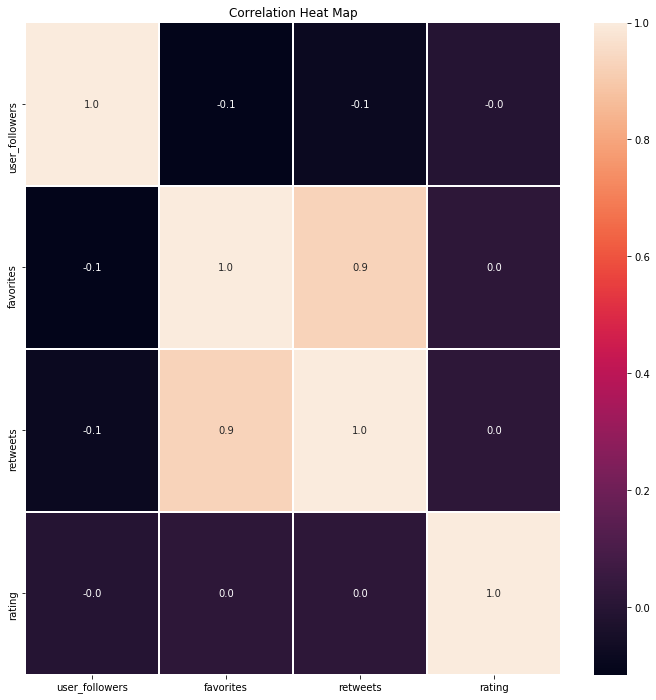

In [63]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_twitter_clean[['source','user_followers','favorites','retweets',
               'rating']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

(-1.2457732684002534,
 1.0290171142057392,
 -1.3967591333242542,
 1.3235155544895152)

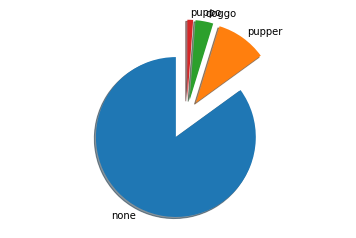

In [64]:
#Pie chart of Life stage of dogs
df_count_stages = list(df_twitter_clean[df_twitter_clean['stage'] != 'None']['stage'].value_counts())[0:4]
life_stages = df_twitter_clean[df_twitter_clean['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.3, 0.2, 0.2, 0.2) #we can use the explosion property of slices of a pie chart to make it more efficient

figure1, axis1 = plt.subplots()
axis1.pie(df_count_stages, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')


Text(0.5,1,'Retweets and favorites Scatter plot')

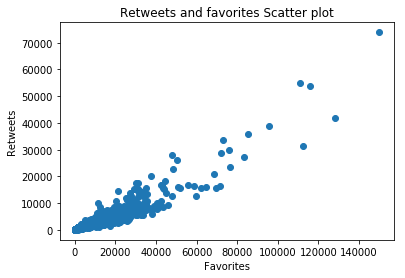

In [65]:
#Scatter plot between favorites and retweets.
plt.scatter(df_twitter_clean['favorites'], df_twitter_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')


From above plot, we can see there is a correlation between the number of retweets and the favoirits for every tweet which shows how humans could react more positevly for the tweets or posts that they likes better 

In [66]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2017-02-16 01:04:13 to 2016-06-20 20:49:19
Data columns (total 14 columns):
tweet_id          1987 non-null object
source            1987 non-null category
text              1987 non-null object
expanded_urls     1987 non-null object
rating            1987 non-null int64
name              1987 non-null object
favorites         1987 non-null int64
retweets          1987 non-null int64
user_followers    1987 non-null int64
jpg_url           1987 non-null object
prediction        1679 non-null object
confidence        1987 non-null float64
stage             1987 non-null category
dog_gender        857 non-null category
dtypes: category(3), float64(1), int64(4), object(6)
memory usage: 192.5+ KB


In [67]:

df_twitter_clean[['rating', 'retweets', 'favorites', 'confidence']].describe()

,rating,retweets,favorites,confidence
count,1987.000000,1987.000000,1987.000000,1987.000000
mean,12.211374,2340.171616,7973.297433,0.463913
std,41.536521,4187.307943,11747.136108,0.339364
min,0.000000,11.000000,69.000000,0.000000
25%,10.000000,524.500000,1706.000000,0.140041
50%,11.000000,1130.000000,3606.000000,0.457356
75%,12.000000,2665.000000,9900.500000,0.776138
max,1776.000000,73931.000000,149895.000000,0.999956


In [68]:

with_stage_sum = sum(df_twitter_clean.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / df_twitter_clean.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  305
Percentage of tweets:          15%


Only a small proportion of tweets with dog stages identified.

In [70]:
df_twitter_clean['rating'].value_counts()

12      447
10      411
11      399
13      260
9       151
8        98
7        54
14       36
6        33
5        31
3        19
4        16
2        10
1         5
0         2
420       1
24        1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
1776      1
Name: rating, dtype: int64

it seems like that the most rate has been given to dogs is 12/10 and also that 10/10 is the second most given rate , and we can see that 14/10 has been given for just 36 types of dogs

Analysis

-There is strong correlation between favorites and retweets.

-Negative correlation between user followers and retweets.

-Dogs in Pupper stage get most tweets, which is expected.

-There is a big positive 0.9 correlation shown by correlation heat map between the retweets and favorites.

Conclusion

Through all the analysis I made,I can say that the twitter data of WeRateDogs gives us a lot of interesting perceptions about people's tweet about the different breeds of dogs w:r:t their different life stages. Moreover, it is clear that having more followers on twitter doesn't increase the retweets of user's tweet.



In [72]:
df_twitter_clean['prediction'].value_counts()

golden_retriever               158
Labrador_retriever             106
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      50
chow                            48
Pomeranian                      42
Samoyed                         41
malamute                        33
Chesapeake_Bay_retriever        31
French_bulldog                  30
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
Cardigan                        21
German_shepherd                 21
Staffordshire_bullterrier       20
Shih-Tzu                        20
beagle                          20
Siberian_husky                  20
Rottweiler                      19
Shetland_sheepdog               19
Maltese_dog                     19
kuvasz                          18
Lakeland_terrier                18
basset                          17
Italian_greyhound               17
West_Highland_white_

The 'golden_retriever' dog type is the most common dog that has been rated